In [ ]:

!pip install snntorch

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 125.3/125.3 kB 4.9 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.19.3-py3-none-manylinux1_x86_64.whl (166.0 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-many

In [ ]:
pip install tensorflow

In [ ]:
pip install memory_profiler

11490434/11490434 [==============================] - 0s 0us/step
Training images: (60000, 28, 28)
Training labels: (60000,)
Test images: (10000, 28, 28)
Test labels: (10000,)
Label :  2


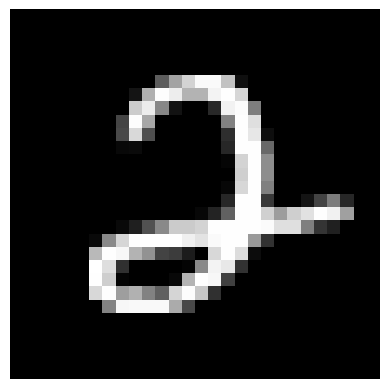

In [ ]:
from tensorflow.keras.datasets import mnist

# Load the CIFAR-10 dataset
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Print the data shapes
print("Training images:", train_images.shape)
print("Training labels:", train_labels.shape)
print("Test images:", test_images.shape)
print("Test labels:", test_labels.shape)


# Select an image index to visualize (adjust as needed)
image_index = 16

# Get the image and normalize pixel values (usually between 0-1)
image = train_images[image_index]

# Plot the image using matplotlib (assuming RGB channels)
import matplotlib.pyplot as plt

print("Label : " , train_labels[image_index])
plt.imshow(image,cmap = 'gray')
plt.axis('off')
plt.show()


In [ ]:
type(image)

numpy.ndarray

In [ ]:
type(train_labels)

numpy.ndarray

Epoch 1/15
1875/1875 [==============================] - 26s 14ms/step - loss: 0.1323 - accuracy: 0.9582 - val_loss: 0.0607 - val_accuracy: 0.9808
Epoch 2/15
1875/1875 [==============================] - 25s 13ms/step - loss: 0.0416 - accuracy: 0.9875 - val_loss: 0.0433 - val_accuracy: 0.9851
Epoch 3/15
1875/1875 [==============================] - 27s 14ms/step - loss: 0.0238 - accuracy: 0.9924 - val_loss: 0.0574 - val_accuracy: 0.9830
Epoch 4/15
1875/1875 [==============================] - 25s 13ms/step - loss: 0.0161 - accuracy: 0.9947 - val_loss: 0.0464 - val_accuracy: 0.9860
Epoch 5/15
1875/1875 [==============================] - 25s 13ms/step - loss: 0.0116 - accuracy: 0.9962 - val_loss: 0.0505 - val_accuracy: 0.9853
Epoch 6/15
1875/1875 [==============================] - 25s 13ms/step - loss: 0.0072 - accuracy: 0.9977 - val_loss: 0.0443 - val_accuracy: 0.9885
Epoch 7/15
1875/1875 [==============================] - 25s 13ms/step - loss: 0.0058 - accuracy: 0.9980 - val_loss: 0.0659 -

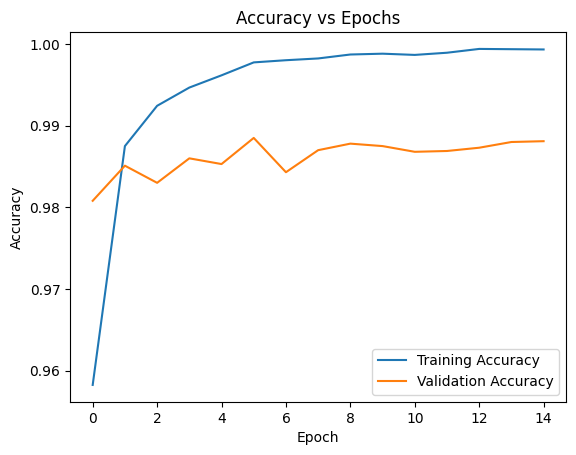

313/313 [==============================] - 1s 4ms/step - loss: 0.0652 - accuracy: 0.9881
Accuracy: 98.81%



In [ ]:
# Import necessary libraries
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import History

# Load MNIST data
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Preprocess data (normalize pixel values)
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Reshape data to fit the model
x_train = x_train.reshape((x_train.shape[0], 28, 28, 1))
x_test = x_test.reshape((x_test.shape[0], 28, 28, 1))

# One-hot encode target labels
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Define the CNN model
cnn_model = Sequential()
cnn_model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1)))
cnn_model.add(MaxPooling2D((2, 2)))
cnn_model.add(Flatten())
cnn_model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
cnn_model.add(Dense(10, activation='softmax'))  # 10 units for 10 classes

# Compile the model
cnn_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Create a history object to store accuracy values during training
history = History()

# Train the model with callbacks
cnn_model.fit(x_train, y_train, epochs=15, batch_size=32, validation_data=(x_test, y_test), callbacks=[history])

# Get accuracy and loss values from the history object
acc_hist = history.history['accuracy']
val_acc_hist = history.history['val_accuracy']
loss_hist = history.history['loss']
val_loss_hist = history.history['val_loss']


# Evaluate the model on test data
loss, accuracy = cnn_model.evaluate(x_test, y_test)
print(f"Accuracy: {accuracy * 100:.2f}%\n")


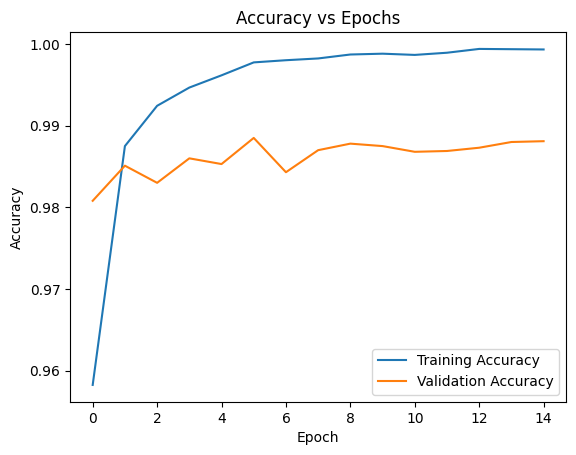

In [ ]:
# Plot accuracy vs epochs
#plt.plot(acc_hist, label='Training Accuracy')
plt.plot(val_acc_hist, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Epochs')
plt.legend()
plt.show()


In [ ]:
#testing the predictions for the data in CNN
import matplotlib.pyplot as plt
import numpy as np

def predict_and_plot(model,image_index):
  """
  This function takes a pre-trained model, an image, and its corresponding label,
  makes a prediction on the image using the model, and plots the image along with the predicted label.

  Args:
      model: The trained Keras model.
      image: A NumPy array representing the image to predict.
      label: The true label of the image (optional).
  """
  # Preprocess the image (normalize pixel values if needed for your model)
  # Assuming your model expects normalized values between 0 and 1

  image = test_images[image_index]
  # Expand the image dimension for the model (if applicable)
  image = np.expand_dims(image, axis=0)  # Add a batch dimension
  image = image.reshape((1, 28, 28, 1))
  # Make prediction
  predictions = model.predict(image)
  predicted_class = np.argmax(predictions[0])  # Get index of the highest probability class

  # Print predicted label

  print(f"Actual Label: {test_labels[image_index]}")
  print(f"Predicted Label: {predicted_class}")

  plt.imshow(image[0], cmap = 'gray')
  plt.axis('off')



  plt.show()

You can how the model predicts any of the test images by changing the index of the image.

1/1 [==============================] - 0s 70ms/step
Actual Label: 0
Predicted Label: 0


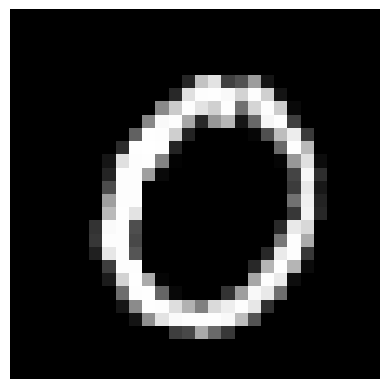

In [ ]:

#'x_test' and 'y_test' are your test data
image_index = 101 # Change this index to test different images
predict_and_plot(cnn_model,image_index)


In [ ]:
acc_hist

[0.9864000082015991]